# Introducción

Para cada uno de los ejercicios, debe auto-completar con Markdown los textos, y además debera utilizar solo y exclusivamente las librerías requeridas. De manera opcional puede entregar tablas de los resultados, y gráficos de los datos, que pueden compensar algun error en la resolución del ejercicio, pero siempre a partir de funciones.

`# Inserte aca las librerias y dependencias necesarias para el desarrollo del ejercicio:`




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import spearmanr
from scipy.stats import kendalltau

`# Inserte aca la lectura del archivo a utilizar en el desarrollo del ejercicio:`

In [2]:
df1 = pd.read_excel('Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

#df1 = pd.read_excel('/content/data/Base_clientes_Monopoly.xlsx', 'Transición de Negocio', skiprows=[0])

df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0,NaN


`# Utilice un ejemplo de vectores a partir de los datos:`

In [3]:
#En esta linea de codigo usaremos la columna Subsegmento para mostrar un vector

df1['Subsegmento']

0        160
1        160
2        170
3        151
4        170
        ... 
51119    160
51120    170
51121    160
51122    160
51123    170
Name: Subsegmento, Length: 51124, dtype: int64

`# Utilice un ejemplo de matrices a partir de los datos:`

In [4]:
df_matriz = df1.iloc[:, 0:2]
df_matriz

,Id,Subsegmento
0,1,160
1,2,160
2,3,170
3,4,151
4,5,170
...,...,...
51119,51120,160
51120,51121,170
51121,51122,160
51122,51123,160


`# Utilice un ejemplo de media, a partir de una de las columnas a su elección:`

In [5]:
df1['Edad'].mean()

38.70287927392223

`# Utilice un ejemplo de media recortada, a partir de una de las columnas a su elección:`

In [6]:
stats.trim_mean(df1['Edad'], 0.1)

37.055721271393644

`# Utilice un ejemplo de mediana, a partir de una de las columnas a su elección:`

In [7]:
np.median(df1['Edad'])

35.0

`# Utilice un ejemplo de rango intercuartil, a partir de una de las columnas a su elección:`

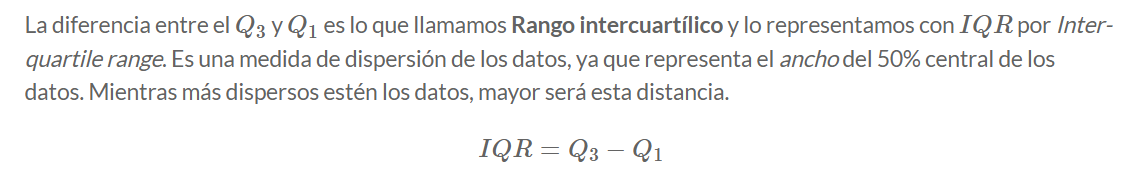

El rango en donde esta la concentración de datos de los intercuartiles ronda entre los 20.000 y 32.000 aproximadamente.

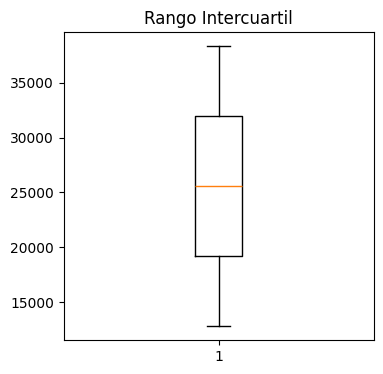

In [8]:
q1 = df1['Renta'].quantile(0.25)
q3 = df1['Renta'].quantile(0.75)
iqr = q3 - q1
iqr

df1_q1 = int(df1['Id'].count().sum() * 0.25)
df1_q2 = int(df1['Id'].count().sum() * 0.75)

df_iqr = df1.iloc[df1_q1:df1_q2, 0]

fig1, axs = plt.subplots(figsize=(4,4))

axs.set_title('Rango Intercuartil')
axs.boxplot(df_iqr)

plt.show()

`# Utilice un ejemplo de datos faltantes, mediante imputación de las columnas a su elección:`

In [9]:
#Cantidad de datos nulos dentro de la columna Renta
df1['Renta'].isnull().sum()

13365

A continuación se realizó la imputación de datos de la columna Renta con el método fillna usando su promedio.
Con esto se pudo eliminar por completo los datos nulos de la columna.

In [10]:
a = df1['Renta']
prom_Renta = a.mean()

df_mean = df1.fillna({'Renta':prom_Renta})
df_mean['Renta'].isnull().sum()

0

`# Utilice un ejemplo de datos falantes, mediante K-NN de una de las columnas a su elección:`

In [11]:
#Cantidad de datos nulos dentro de la columna Renta
df1['Renta'].isnull().sum()

13365

Se utilizo el imputador KNNImputer y luego se graficaron los primeros 10.000 datos

In [12]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

df1_new = df1.copy()

df1_new[['Renta']] = knn_imputer.fit_transform(df1_new[['Renta']])

df1_new[['Renta']].isnull().sum()

Renta    0
dtype: int64

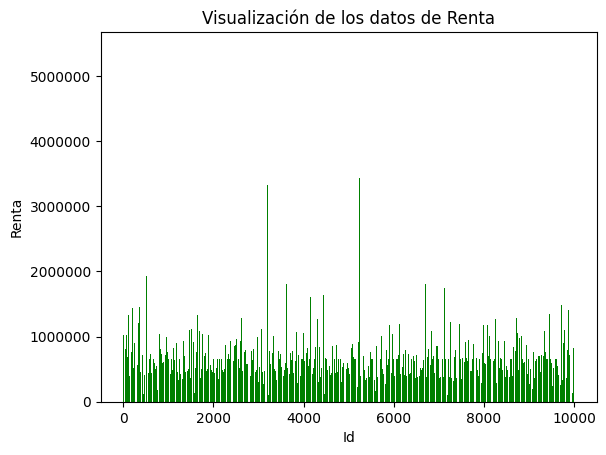

In [13]:
plt.bar(df1_new['Id'][:10000], df1_new['Renta'][:10000], color='green')
plt.xlabel('Id')
plt.ylabel('Renta')
plt.title('Visualización de los datos de Renta')
plt.ticklabel_format(style='plain')
plt.show()

`# Utilice un ejemplo de escalamiento a elección, a partir de una de las columnas a su elección:`

In [14]:
scaler = MinMaxScaler()
df1_new['Renta_Scaled'] = scaler.fit_transform(df1_new[['Renta']])

df1_new['Renta_Scaled'].describe()

count    51124.000000
mean         0.050658
std          0.026872
min          0.000000
25%          0.035675
50%          0.050658
75%          0.054204
max          1.000000
Name: Renta_Scaled, dtype: float64

`# Utilice un ejemplo de encoding, a partir de una de las columnas a su elección:`

In [15]:
encoder = LabelEncoder()

df1_new['Sexo_Encoded'] = encoder.fit_transform(df1_new["Sexo"])

df1_new['Sexo_Encoded']

0        1
1        0
2        0
3        0
4        0
        ..
51119    0
51120    0
51121    0
51122    1
51123    0
Name: Sexo_Encoded, Length: 51124, dtype: int32

In [16]:
df1_new.iloc[:, :14]

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario
0,1,160,M,13.0,43,663077.078726,130,1,1,0,0,1,0,0
1,2,160,H,13.0,46,143640.000000,69,1,0,0,0,1,0,1
2,3,170,H,13.0,45,929106.000000,24,1,1,0,0,1,0,1
3,4,151,H,13.0,46,172447.000000,134,0,1,0,1,0,0,0
4,5,170,H,13.0,46,805250.000000,116,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.000000,57,1,1,1,0,1,0,0
51120,51121,170,H,13.0,51,625376.000000,39,1,0,0,0,1,0,0
51121,51122,160,H,13.0,47,806220.000000,153,1,1,0,0,1,0,0
51122,51123,160,M,13.0,47,663077.078726,11,1,0,0,0,1,0,0


Correlación de Searmanr entre Edad y Subsegmento: -0.6018046083816241


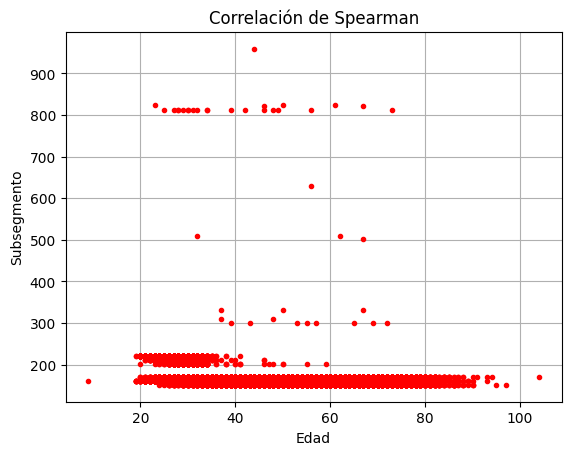

In [17]:
df_test = df1_new.loc[:,["Edad", "Subsegmento"]]
correlation_spearmanr, p_value = spearmanr(df_test.iloc[:, 0], df_test.iloc[:, 1])


print("Correlación de Searmanr entre Edad y Subsegmento:", correlation_spearmanr)

plt.plot(df_test.iloc[:, 0], df_test.iloc[:, 1], "r.")
plt.xlabel('Edad')
plt.ylabel('Subsegmento')
plt.title('Correlación de Spearman')

plt.grid(True)
plt.show()

In [18]:
df_test = df1_new.loc[:, ["Edad", "Renta_Scaled"]]
correlation_pearson, p_value = df_test.corr(method='pearson').iloc[0, 1]

print("Correlación de Pearson entre Edad y Renta_Scaled:", correlation_pearson)

plt.plot(df_test.loc[:, "Edad"], df_test.loc[:, "Renta_Scaled"], "r.")
plt.xlabel('Edad')
plt.ylabel('Renta_Scaled')
plt.title('Correlación de Pearson')

plt.grid(True)
plt.show()

TypeError: cannot unpack non-iterable numpy.float64 object

In [ ]:
df_test = df1_new.loc[:, ["Edad", "Renta_Scaled"]]
correlation_kendall, p_value = kendalltau(df_test.iloc[:, 0], df_test.iloc[:, 1])

print("Correlación de Kendall entre Edad y Renta_Scaled:", correlation_kendall)

plt.plot(df_test.loc[:, "Edad"], df_test.loc[:, "Renta_Scaled"], "r.")
plt.xlabel('Edad')
plt.ylabel('Renta_Scaled')
plt.title("Correlación de Kendall")

plt.grid(True)
plt.show()

NameError: name 'df1_new' is not defined

# Arboles de Decisión

In [ ]:
## 
X = df1_new.loc[:,["Id","Sexo","Sexo_Encoded","Region","Edad","Renta","Renta_Scaled","Antiguedad","Internauta","Adicional","Dualidad",
"Monoproducto","Ctacte","Consumo","Hipotecario","Debito","CambioPin","Cuentas",
"TC"]]

y = df1_new.loc[:, "Subsegmento"]

